In [1]:
import numpy as np
import pandas as pd
import bokeh
from bokeh.models import ColumnDataSource
import pyproj
from pyproj import Transformer
from datetime import date,datetime

In [2]:
#Loading twitter data into the python environment

twitter_data = pd.read_csv("complete_swiss_dataset.csv",encoding = "ISO-8859-15")

C:\Users\Laptop\Anaconda3\envs\Master Project\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (19,22,25,38,39,44,54,57,63,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,101) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
twitter_data.head()

,Unnamed: 0,user_screen_name,PK,id,latitude,longitude,raw_geo,place_type,place_full_name,place_country_code,...,created_at_CET,created_at_GMT,created_at_EST,check_in_bot,weather_station_bot,Stress.overall.score,homeplace,workplace,cap_english,cap_universal
0,1,________char,938162910789906432_207206008_47.5623099_7.5929...,938162910789906432,47.56231,7.59298,"{u'type': u'Point', u'coordinates': [7.59298, ...",city,"Basel, Switzerland",CH,...,2017-12-05 22:47:22,2017-12-05 21:47:22,2017-12-05 16:47:22,False,False,0,0,0,0.001554,0.002431
1,2,______aki______,916556894617194496_107519313_47.4506607_8.5832...,916556894617194496,47.45066,8.58321,"{u'type': u'Point', u'coordinates': [8.58321, ...",city,"Kloten, Schweiz",CH,...,2017-10-07 08:52:47,2017-10-07 06:52:47,2017-10-07 01:52:47,False,False,0,0,0,0.002857,0.004725
2,3,______pistolero,846853451816583168_1655581028_46.2015699_6.155...,846853451816583168,46.20157,6.15554,"{u'type': u'Point', u'coordinates': [6.15554, ...",city,"Geneva, Switzerland",CH,...,2017-03-29 00:36:11,2017-03-28 22:36:11,2017-03-28 17:36:11,False,False,0,0,0,0.001725,0.002014
3,4,_____FLOW_____,614746843797397504_17493553_47.55831243_7.5876...,614746843797397504,47.55831,7.58769,"{u'type': u'Point', u'coordinates': [7.5876903...",city,"Basel, Switzerland",CH,...,2015-06-27 12:47:23,2015-06-27 10:47:23,2015-06-27 05:47:23,True,False,0,0,0,0.085904,0.104603
4,5,_____helen____,552088809727619072_838437504_46.85314442_9.512...,552088809727619072,46.85314,9.51271,"{u'type': u'Point', u'coordinates': [9.5127096...",city,"Chur, Switzerland",CH,...,2015-01-05 14:06:44,2015-01-05 13:06:44,2015-01-05 08:06:44,False,False,0,0,0,0.125146,0.075193


In [4]:
for i in range(0,len(twitter_data.columns)):
    print(twitter_data.columns[i])

Unnamed: 0
user_screen_name
PK
id
latitude
longitude
raw_geo
place_type
place_full_name
place_country_code
created_at
text
source
retweet_count
favorite_count
is_retweet
is_favorite
is_quote
is_reply
quoted_status_id_permalink
in_reply_to_status_id
in_reply_to_user_id
in_reply_to_screen_name
time_zone
time_zone_utc_offset
user_location
lang
user_id
user_name
user_account_geo_enabled
n_user_mentions
n_hashtags
n_symbols
n_media
n_urls
user_mentions
hashtags
symbols
media
media_types
urls
place_bounding_box_type
place_bounding_box_coords
raw_geo_obj_jic
user_profile_description
user_profile_description_length
user_is_verified
user_total_number_of_tweets_ever
user_followers_count
user_following_count
user_favourited_other_tweets_count
default_profile
user_custom_profile_image
profile_image_url_https
profile_banner_url
profile_background_image_url_https
user_custom_profile_bg_colour
user_custom_profile_bg_colour_hex
user_custom_profile_sidebar_fill_colour
user_custom_profile_sidebar_fill_c

In [5]:
time_data = twitter_data[['created_at_CET','Overall.score']].sort_values(by='created_at_CET',ignore_index=True)

In [6]:
time_data.head()

,created_at_CET,Overall.score
0,2015-01-01 01:00:03,0
1,2015-01-01 01:00:09,0
2,2015-01-01 01:00:14,3
3,2015-01-01 01:00:22,0
4,2015-01-01 01:00:34,0


In [7]:
twitter_data['created_at_CET'][921301]

'2015-01-01 01:00:14'

In [8]:
twitter_data[['latitude','longitude']].head()

,latitude,longitude
0,47.56231,7.59298
1,47.45066,8.58321
2,46.20157,6.15554
3,47.55831,7.58769
4,46.85314,9.51271


In [9]:
coord_data = twitter_data[['latitude','longitude']]
coord_data = coord_data.round(3)

In [10]:
coord_data.head()

,latitude,longitude
0,47.562,7.593
1,47.451,8.583
2,46.202,6.156
3,47.558,7.588
4,46.853,9.513


In [11]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")

In [12]:
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, OSM, get_provider

output_file("tile.html")

tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(650000, 1200000), y_range=(5700000, 6100000),
           x_axis_type="mercator", y_axis_type="mercator", plot_width=1000)
p.add_tile(tile_provider)

transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")

merc_coord = transformer.transform(coord_data['latitude'].values,
                            coord_data['longitude'].values)

source = ColumnDataSource(data=dict(longitude=merc_coord[0], latitude=merc_coord[1]))

p.circle(x='longitude', y='latitude', size=1, color="black", alpha=0.7, source=source)

#show(p)

GlyphRenderer(id='1047', ...)

In [13]:
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, OSM, get_provider

output_file("tile.html")

tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(650000, 1200000), y_range=(5700000, 6100000),
           x_axis_type="mercator", y_axis_type="mercator",
           plot_width=1000)
p.add_tile(tile_provider)

transformer = Transformer.from_crs("epsg:4326", "EPSG:3857")

coord_data_no_dup = coord_data.drop_duplicates()

merc_coord_no_dup = transformer.transform(coord_data_no_dup['latitude'].values,
                                   coord_data_no_dup['longitude'].values)

source = ColumnDataSource(data=dict(longitude=merc_coord_no_dup[0], latitude=merc_coord_no_dup[1]))

p.circle(x='longitude', y='latitude', size=1, color="black", alpha=0.7, source=source)

show(p)

In [14]:
CH = ((6,  11), (45.5, 48))

from datashader.utils import lnglat_to_meters as webm
x_range,y_range = [list(r) for r in webm(*CH)]

plot_width  = int(3096)
plot_height = int(plot_width*7.0/12)

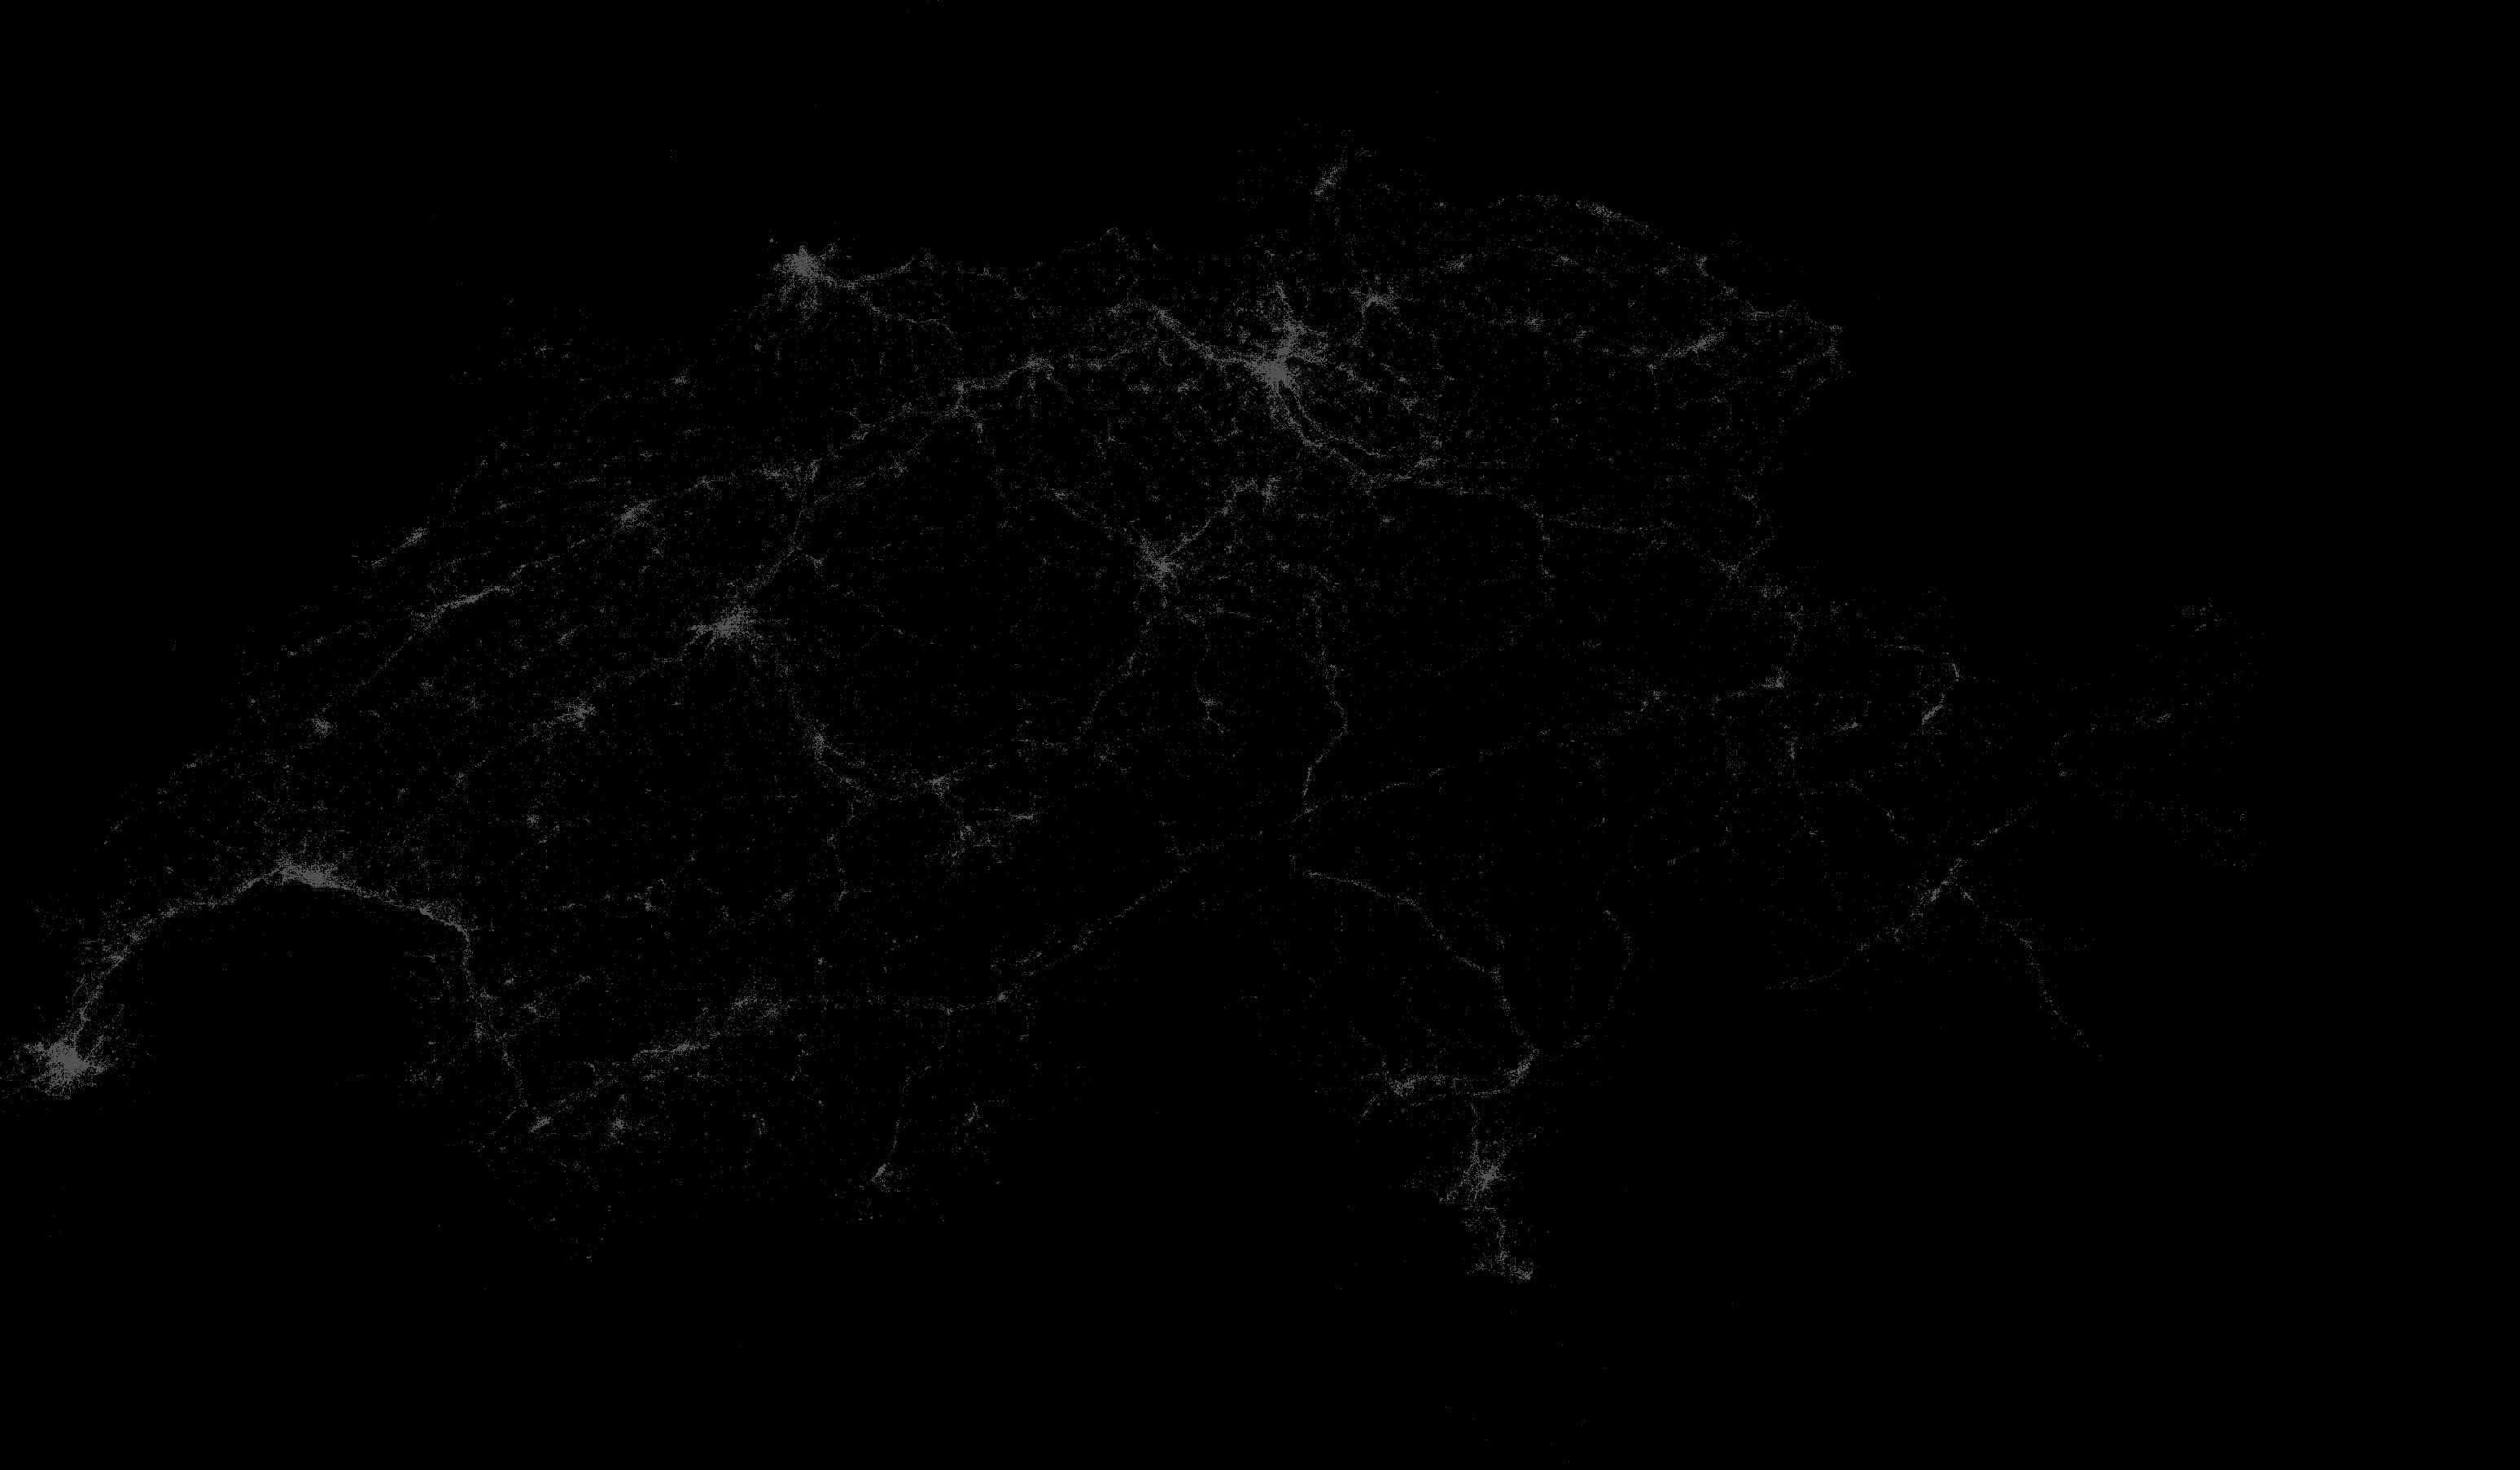

In [16]:
import datashader as ds, datashader.transfer_functions as tf, numpy as np
from datashader import spatial

background = "black"

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.core.display import HTML, display

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

cvs = ds.Canvas(plot_width, plot_height, *webm(*CH))

#Formatting merc_coord for datashader
merc_coord_ds = pd.DataFrame(np.array(merc_coord).T)
merc_coord_ds.columns = ['latitude','longitude']


agg = cvs.points(merc_coord_ds, 'latitude', 'longitude')
export(tf.shade(agg, cmap = cm(Greys9,0.25), how='linear'),"census_gray_linear")

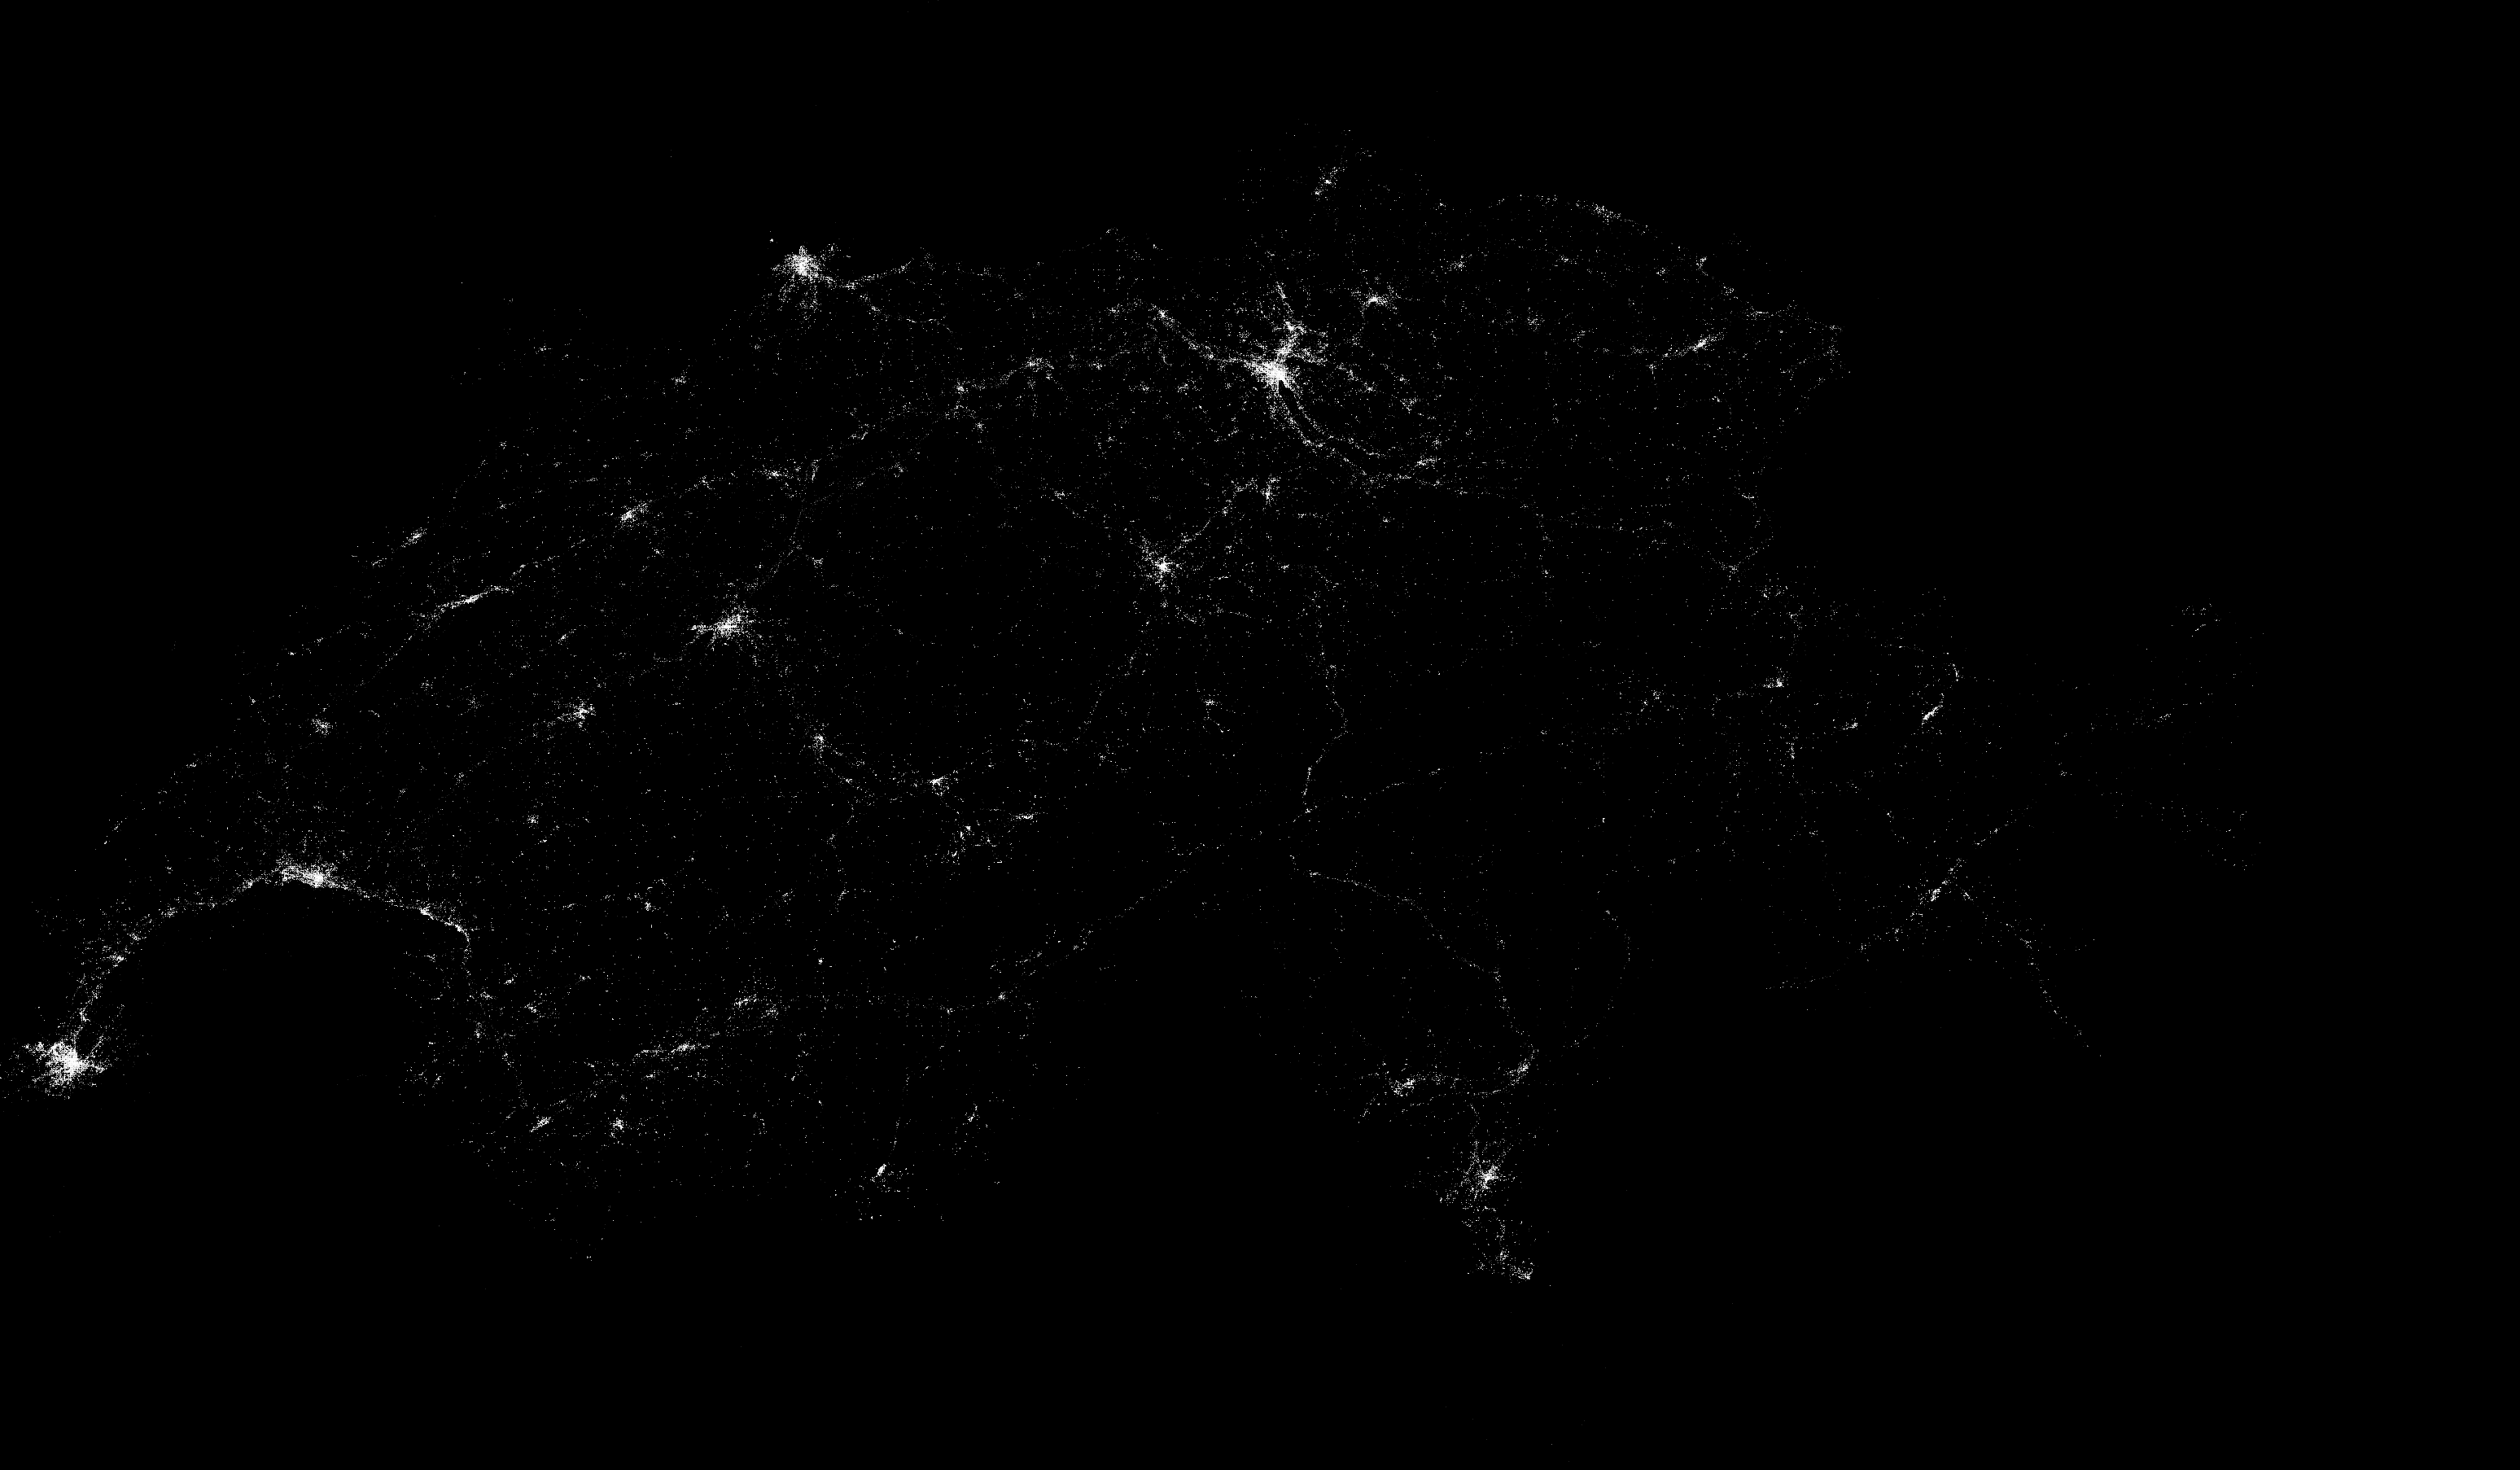

In [17]:
export(tf.shade(agg, cmap = cm(Greys9,0.2), how='eq_hist'),"census_gray_eq_hist")

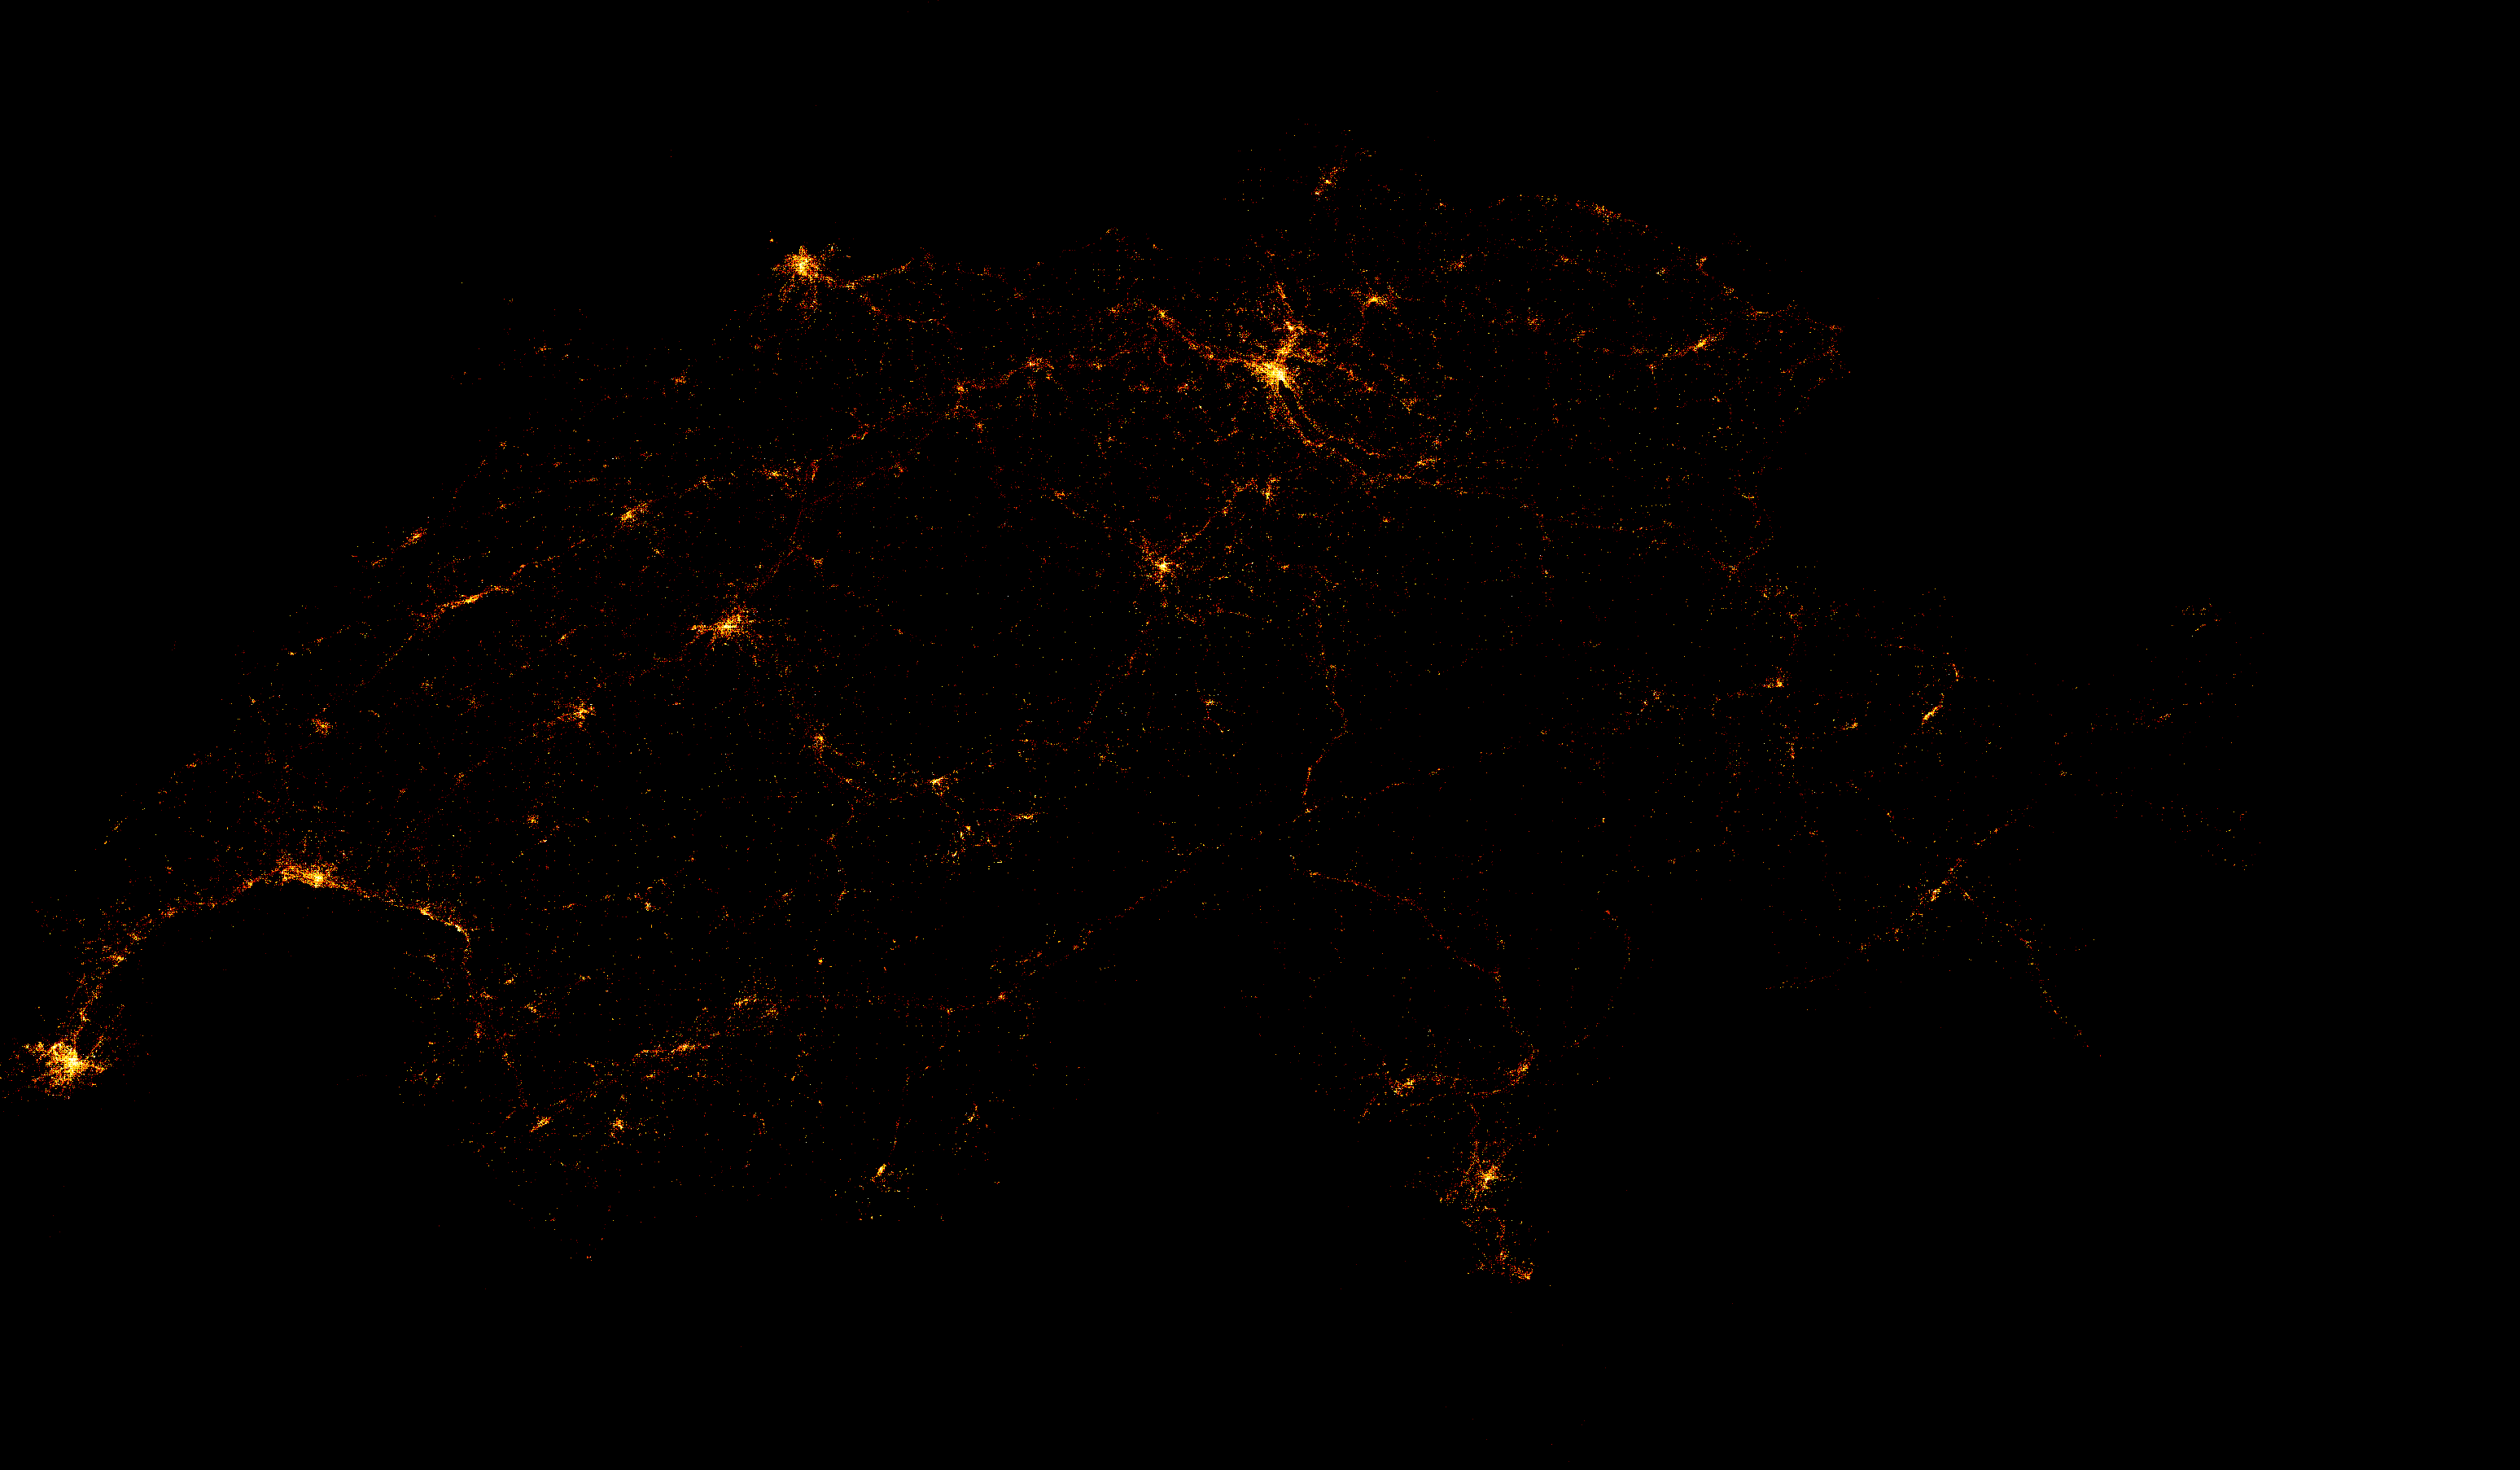

In [18]:
from colorcet import fire
export(tf.shade(agg, cmap = cm(fire,0.2), how='eq_hist'),"census_ds_fire_eq_hist")

In [ ]:
import holoviews as hv, geoviews as gv, geoviews.tile_sources as gts
from holoviews.operation.datashader import datashade, dynspread
from holoviews import opts
hv.extension('bokeh')

opts.defaults(
    opts.Overlay(width=900, height=525, xaxis=None, yaxis=None))

In [ ]:
points = hv.Points(gv.Dataset(merc_coord_ds, kdims=['latitude', 'longitude']))

In [ ]:
population = dynspread(datashade(points, cmap=fire, element_type=gv.Image))

In [ ]:
population = dynspread(datashade(points, cmap=fire, element_type=gv.Image))
gts.EsriImagery() * population

In [37]:
import yaml

from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Slider, Button, TextInput, DateRangeSlider
from bokeh.plotting import figure
from bokeh.themes import Theme
from bokeh.io import show, output_notebook

output_notebook()

Loading BokehJS ...

In [28]:
dev_coord_data_time = twitter_data[['latitude','longitude','created_at_CET']]

In [29]:
dev_coord_data_time = dev_coord_data_time.set_index(['created_at_CET'])

In [30]:
dev_coord_data_time

,latitude,longitude
created_at_CET,,
2017-12-05 22:47:22,47.56231,7.592980
2017-10-07 08:52:47,47.45066,8.583210
2017-03-29 00:36:11,46.20157,6.155540
2015-06-27 12:47:23,47.55831,7.587690
2015-01-05 14:06:44,46.85314,9.512710
...,...,...
2015-11-26 15:03:17,47.36670,8.550000
2015-11-28 22:38:34,46.87157,9.536656
2018-07-14 07:49:02,46.23149,6.132063


In [31]:
dev_coord_data_time.index = pd.to_datetime(dev_coord_data_time.index, format='%Y-%m-%d %H:%M:%S')

In [32]:
dev_coord_data_time = dev_coord_data_time.sort_index()

In [40]:
def bkapp(doc):

    tile_provider = get_provider(CARTODBPOSITRON)

    # range bounds supplied in web mercator coordinates
    p = figure(x_range=(650000, 1200000), y_range=(5700000, 6100000),
               x_axis_type="mercator", y_axis_type="mercator")
    p.add_tile(tile_provider)

    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")

    dev_merc_coord = transformer.transform(dev_coord_data_time['latitude']['2015-1-1':'2015-2-1'].values,
                                dev_coord_data_time['longitude']['2015-1-1':'2015-2-1'].values)

    source = ColumnDataSource(data=dict(longitude=dev_merc_coord[0], latitude=dev_merc_coord[1]))

    p.circle(x='longitude', y='latitude', size=1, color="black", alpha=0.7, source=source)
    
    def callback(attr, old, new):
        
        start_date = date.fromtimestamp(new[0]/1000)
        
        end_date = date.fromtimestamp(new[1]/1000)
        
        dev_merc_coord = transformer.transform(dev_coord_data_time['latitude'][start_date:end_date].values,
                                               dev_coord_data_time['longitude'][start_date:end_date].values)
        
        source.data = dict(longitude=dev_merc_coord[0], latitude=dev_merc_coord[1])
        

    date_slider = DateRangeSlider(title="Date Range: ", start=date(2015, 1, 1),
                                 end=date(2018,9,6), value=(date(2015, 1, 1), date(2015, 12, 31)), step=1)
    
    date_slider.on_change('value', callback)
    
    def my_button_handler(new):
        
        start_date = start_date_input.value
        
        end_date = end_date_input.value
        
        dev_merc_coord = transformer.transform(dev_coord_data_time['latitude'][start_date:end_date].values,
                                               dev_coord_data_time['longitude'][start_date:end_date].values)
        
        source.data = dict(longitude=dev_merc_coord[0], latitude=dev_merc_coord[1])

    button = Button(label="Update", button_type="success")

    button.on_click(my_button_handler)
    
    start_date_input = DatePicker(value="2015-01-01", title="Start Date:")
    
    end_date_input = DatePicker(value="2015-02-01", title="End Date:")

    doc.add_root(row(column(p),column(start_date_input,end_date_input,button)))

In [41]:
show(bkapp)

In [35]:
from bokeh.io import output_file, show
from bokeh.models import DatePicker

output_file("date_picker.html")

color_picker = DatePicker(title='Test',value="2015-01-01")

show(color_picker)

tornado.application - ERROR - Uncaught exception GET /autoload.js?bokeh-autoload-element=1220&bokeh-absolute-url=http://localhost:62223&resources=none (::1)
HTTPServerRequest(protocol='http', host='localhost:62223', method='GET', uri='/autoload.js?bokeh-autoload-element=1220&bokeh-absolute-url=http://localhost:62223&resources=none', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "C:\Users\Laptop\Anaconda3\envs\Master Project\lib\site-packages\tornado\web.py", line 1703, in _execute
    result = await result
  File "C:\Users\Laptop\Anaconda3\envs\Master Project\lib\site-packages\bokeh\server\views\autoload_js_handler.py", line 60, in get
    session = await self.get_session()
  File "C:\Users\Laptop\Anaconda3\envs\Master Project\lib\site-packages\bokeh\server\views\session_handler.py", line 120, in get_session
    session = await self.application_context.create_session_if_needed(session_id, self.request, token)
  File "C:\Users\Laptop\Anaconda3\envs\Maste

In [ ]:
start_date = date.fromisoformat(start_date_input.value)
        
        end_date = date.fromisoformat(end_date_input.value)
        
        dev_merc_coord = transformer.transform(dev_coord_data_time['latitude'][start_date:end_date].values,
                                               dev_coord_data_time['longitude'][start_date:end_date].values)
        
        source.data = dict(longitude=dev_merc_coord[0], latitude=dev_merc_coord[1])